In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
# from keras.layers.core import Layer
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

import numpy as np
import netCDF4 as nc

# ocean_eta_t_2000_01.nc, about 330 MB

In [3]:
file_path ='C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc'
file_obj = nc.Dataset(file_path)
eta_t = file_obj['eta_t']
eta_t

<class 'netCDF4._netCDF4.Variable'>
int16 eta_t(Time, yt_ocean, xt_ocean)
    long_name: surface height on T cells [Boussinesq (volume conserving) model]
    units: meter
    valid_range: [-32767  32767]
    missing_value: -32768
    _FillValue: -32768
    packing: 4
    scale_factor: 0.03051851
    add_offset: 0.0
    cell_methods: time: mean
    time_avg_info: average_T1,average_T2,average_DT
    coordinates: geolon_t geolat_t
unlimited dimensions: Time
current shape = (31, 1500, 3600)
filling on

# eta_t

In [9]:
eta_t_arr = file_obj['eta_t'][:]
eta_t_arr.shape

(31, 1500, 3600)

In [7]:
eta_t_arr_reshape = eta_t_arr.reshape(31,1500*3600)
eta_t_arr_reshape.shape

(31, 5400000)

In [10]:
from sklearn.model_selection import train_test_split
eta_t_train, eta_t_test = train_test_split(eta_t_arr_reshape, test_size=0.33)

In [11]:
eta_t_train.shape

(20, 5400000)

In [6]:
input_size = 1500*3600
hidden_size = 150*360
output_size = 1500*3600

In [13]:
x = Input(shape=(31,input_size))

In [7]:
h = Dense(hidden_size, activation='relu')(x)

NameError: name 'x' is not defined

In [ ]:
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# Time * yt_ocean

In [39]:
time_ytocean_arr = eta_t_arr[:,:,1]
time_ytocean_arr.shape

(31, 1500)

In [34]:
from sklearn.model_selection import train_test_split
time_ytocean_train, time_ytocean_test = train_test_split(time_ytocean_arr, test_size=0.33)
time_ytocean_train.shape

(20, 1500)

In [35]:
input_size = 1500
hidden_size = 150
output_size = 1500

In [36]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               225150    
_________________________________________________________________
dense_4 (Dense)              (None, 1500)              226500    
Total params: 451,650
Trainable params: 451,650
Non-trainable params: 0
_________________________________________________________________


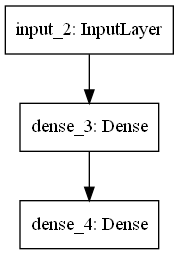

In [37]:
keras.utils.plot_model(autoencoder, "time_ytocean_autoencoder.png")

In [42]:
epochs = 100
batch_size = 1500

history = autoencoder.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

Epoch 1/100
1/1 [==============================] - 0s 110ms/step - loss: 345039648.0000 - val_loss: 345039584.0000
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 345039584.0000 - val_loss: 345039424.0000
Epoch 3/100
1/1 [==============================] - 0s 50ms/step - loss: 345039424.0000 - val_loss: 345039520.0000
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 345039520.0000 - val_loss: 345039488.0000
Epoch 5/100
1/1 [==============================] - 0s 49ms/step - loss: 345039488.0000 - val_loss: 345039520.0000
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 345039520.0000 - val_loss: 345039424.0000
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 345039424.0000 - val_loss: 345039296.0000
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 345039296.0000 - val_loss: 345039296.0000
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 345039296.0000 

dict_keys(['loss', 'val_loss'])


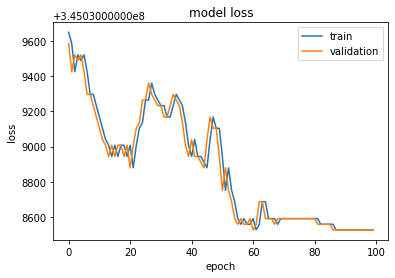

In [43]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()